In [1]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [6]:
data = pd.read_csv('D:\TB PAVD\dataset\Transaksii_Petshop.csv')
data

<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\user\AppData\Local\Temp\ipykernel_21872\3470331244.py:1: SyntaxWarning: invalid escape sequence '\T'
  data = pd.read_csv('D:\TB PAVD\dataset\Transaksii_Petshop.csv')


,ID Transaksi,Tanggal Transaksi,Metode Pembayaran,Nama Barang 1,Kategori Barang 1,Jumlah Barang Dibeli 1,Harga Barang 1,Nama Barang 2,Kategori Barang 2,Jumlah Barang Dibeli 2,...,Harga Barang 3,Nama Barang 4,Kategori Barang 4,Jumlah Barang Dibeli 4,Harga Barang 4,Nama Barang 5,Kategori Barang 5,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi
0,AgPeeLTL,2024-03-02,Cash,Life Cat Pouch Dus,Makanan Kucing,7,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,1,...,20000.0,Life Cat Tofu - Macha,Makanan Kucing,4.0,55833.0,Life Cat Tofu - Mango,Makanan Kucing,1.0,55833.0,1219665
1,X3ih6KPj,2024-09-19,Transfer Bank,Life Cat Pouch Dus,Makanan Kucing,7,108000,Makanan Anjing Purina,Makanan Anjing,2,...,4435.0,Makanan Kucing Whiskas,Makanan Kucing,7.0,45000.0,Life Cat Can - Chicken & Salmon,Makanan Kucing,10.0,12000.0,1308740
2,yJhNjYUP,2024-06-15,Cash,Makanan Anjing Purina,Makanan Anjing,5,50000,Life Cat Pouch - Salmon Adult,Makanan Kucing,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272265
3,JSEmCzSj,2024-05-25,Transfer Bank,Makanan Ikan Gupi,Makanan Ikan,4,35000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,6,...,4435.0,Life Cat Can - Kitten Tuna,Makanan Kucing,8.0,12000.0,Mainan Anjing Kong,Mainan Anjing,1.0,20000.0,305175
4,31sF5GKo,2024-02-27,Transfer Bank,Life Cat Can - Kitten Tuna,Makanan Kucing,7,12000,Mainan Anjing Kong,Mainan Anjing,4,...,12024.0,Life Cat Can - Tuna,Makanan Kucing,6.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,9.0,4453.0,378293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,S4tG3KjI,2024-01-17,Cash,Life Cat Pouch - Chicken adult,Makanan Kucing,4,4435,Makanan Ikan Gupi,Makanan Ikan,4,...,50000.0,Life Cat Can - Tuna,Makanan Kucing,7.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,1.0,4453.0,739193
1096,QbpLQaP8,2024-03-11,Transfer Bank,Life Cat Pouch - Kitten Tuna,Makanan Kucing,5,4435,Life Cat Pouch Dus,Makanan Kucing,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454175
1097,OIdoJEh1,2024-04-15,QRIS,Life Cat Can - Chicken & Salmon,Makanan Kucing,10,12000,Life Cat Can - Kitten Tuna,Makanan Kucing,7,...,4435.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248350
1098,FEh4WalY,2024-07-18,Transfer Bank,Makanan Kucing Whiskas,Makanan Kucing,2,45000,Makanan Ikan Gupi,Makanan Ikan,3,...,55833.0,Life Cat Tofu - Mango,Makanan Kucing,7.0,55833.0,Life Cat Can - Kitten Salmon,Makanan Kucing,1.0,12024.0,653688


Eksplorasi data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Transaksi            1100 non-null   object 
 1   Tanggal Transaksi       1100 non-null   object 
 2   Metode Pembayaran       1100 non-null   object 
 3   Nama Barang 1           1100 non-null   object 
 4   Kategori Barang 1       1100 non-null   object 
 5   Jumlah Barang Dibeli 1  1100 non-null   int64  
 6   Harga Barang 1          1100 non-null   int64  
 7   Nama Barang 2           1100 non-null   object 
 8   Kategori Barang 2       1100 non-null   object 
 9   Jumlah Barang Dibeli 2  1100 non-null   int64  
 10  Harga Barang 2          1100 non-null   int64  
 11  Nama Barang 3           825 non-null    object 
 12  Kategori Barang 3       825 non-null    object 
 13  Jumlah Barang Dibeli 3  825 non-null    float64
 14  Harga Barang 3          825 non-null    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Jumlah Barang Dibeli 1,Harga Barang 1,Jumlah Barang Dibeli 2,Harga Barang 2,Jumlah Barang Dibeli 3,Harga Barang 3,Jumlah Barang Dibeli 4,Harga Barang 4,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi
count,1100.000000,1100.000000,1100.000000,1100.000000,825.000000,825.000000,563.000000,563.000000,287.000000,287.000000,1.100000e+03
mean,5.557273,27788.870909,5.522727,26952.694545,5.490909,26997.431515,5.321492,28147.468917,5.397213,28435.313589,5.237158e+05
std,2.907333,28796.449580,2.810424,26687.787351,2.896722,26948.484414,2.872377,27341.663911,2.938006,29748.850846,3.660114e+05
min,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.000000,4435.000000,1.343500e+04
25%,3.000000,4500.000000,3.000000,4500.000000,3.000000,4453.000000,3.000000,4500.000000,3.000000,4500.000000,2.396445e+05
50%,6.000000,12024.000000,5.500000,12024.000000,6.000000,12024.000000,5.000000,12024.000000,5.000000,12024.000000,4.487500e+05
75%,8.000000,45000.000000,8.000000,45000.000000,8.000000,45000.000000,8.000000,50000.000000,8.000000,45000.000000,7.241692e+05
max,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,10.000000,108000.000000,2.126915e+06


In [ ]:
data.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
ID Transaksi,0
Tanggal Transaksi,0
Metode Pembayaran,0
Nama Barang 1,0
Kategori Barang 1,0
Jumlah Barang Dibeli 1,0
Harga Barang 1,0
Nama Barang 2,0
Kategori Barang 2,0
Jumlah Barang Dibeli 2,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


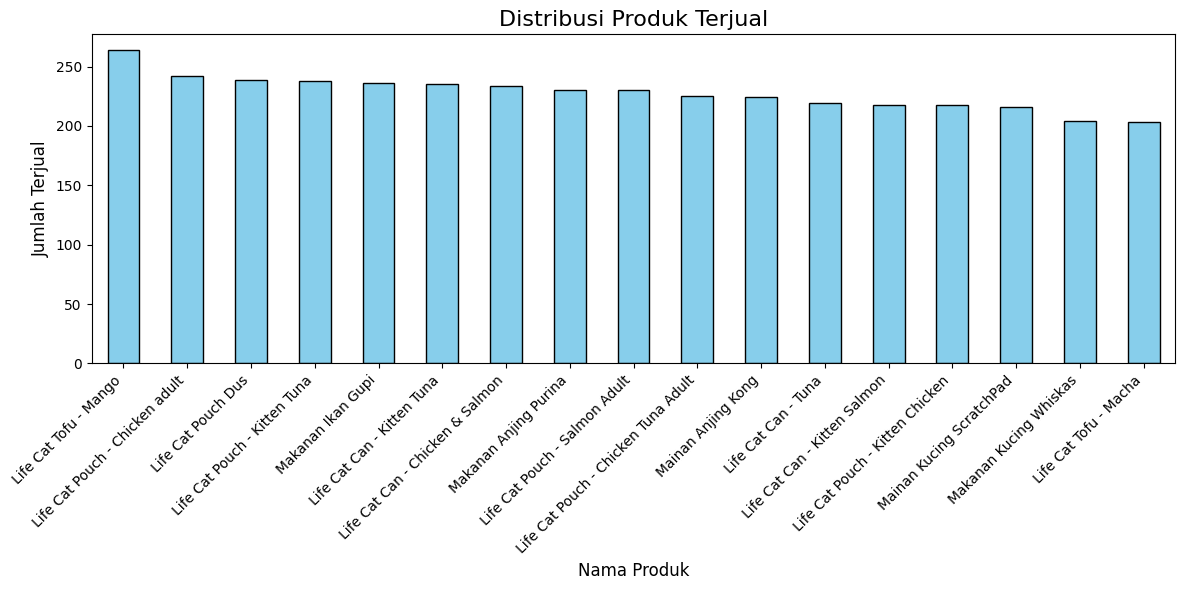

In [ ]:
# Combine all product columns into a single series
all_products = pd.concat([data['Nama Barang 1'], data['Nama Barang 2'], data['Nama Barang 3'], data['Nama Barang 4'],data['Nama Barang 5']])
product_counts = all_products.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Produk Terjual', fontsize=16)
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Jumlah Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


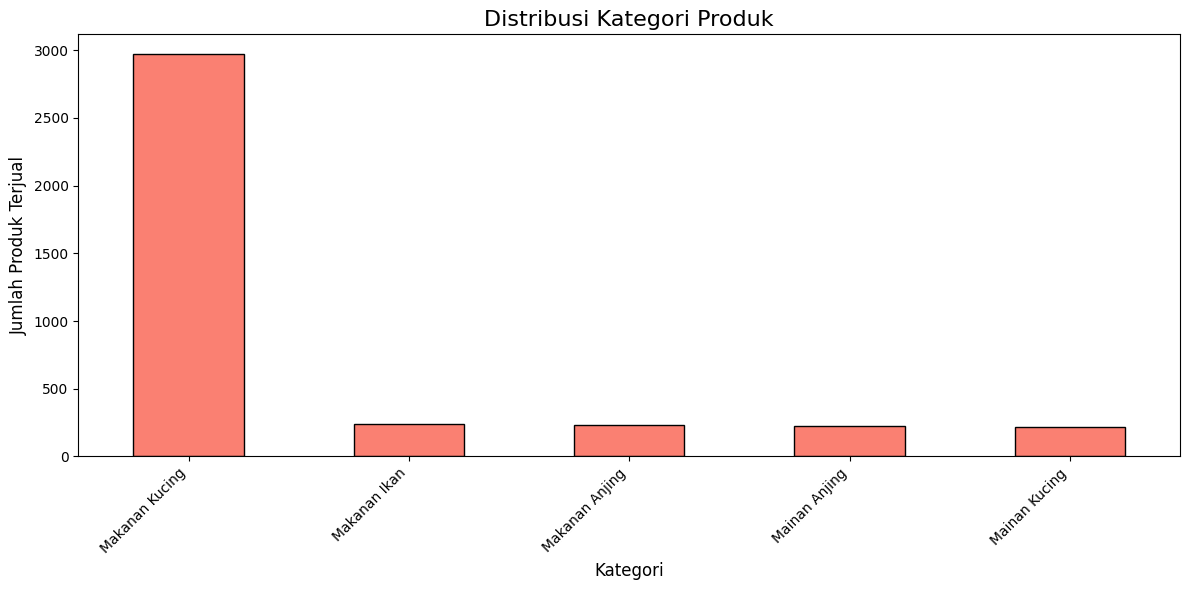

In [ ]:
# Combine all category columns into a single series
all_categories = pd.concat([data['Kategori Barang 1'], data['Kategori Barang 2'], data['Kategori Barang 3'], data['Kategori Barang 4'],data['Kategori Barang 5']])
category_counts = all_categories.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribusi Kategori Produk', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-ed6d5556d8f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Metode Pembayaran'], palette="viridis", order=data['Metode Pembayaran'].value_counts().index)


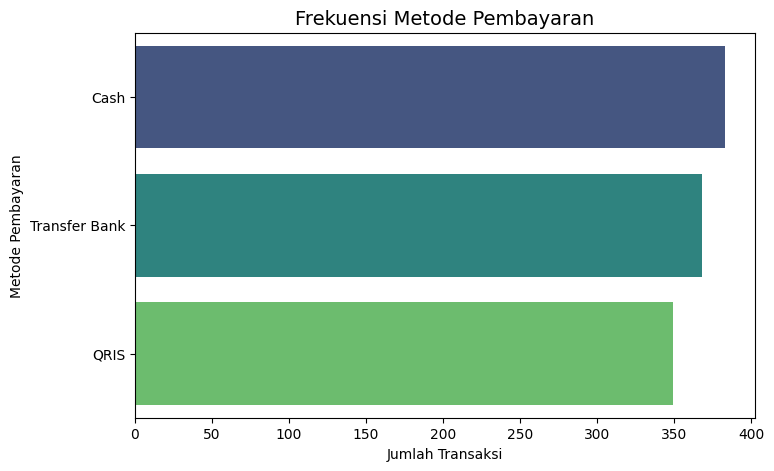

In [ ]:
# Plot 3: Payment method frequency
plt.figure(figsize=(8, 5))
sns.countplot(y=data['Metode Pembayaran'], palette="viridis", order=data['Metode Pembayaran'].value_counts().index)
plt.title("Frekuensi Metode Pembayaran", fontsize=14)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

In [ ]:
# Detecting outliers using IQR
# Outliers in 'Total Harga Transaksi'
q1_harga, q3_harga = data['Total Harga Transaksi'].quantile([0.25, 0.75])
iqr_harga = q3_harga - q1_harga
outlier_harga = data[
    (data['Total Harga Transaksi'] < (q1_harga - 1.5 * iqr_harga)) | (data['Total Harga Transaksi'] > (q3_harga + 1.5 * iqr_harga))
]

# Display results
print("Jumlah Transaksi dengan Outlier pada 'Total Harga Transaksi':", len(outlier_harga))


Jumlah Transaksi dengan Outlier pada 'Total Harga Transaksi': 26


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


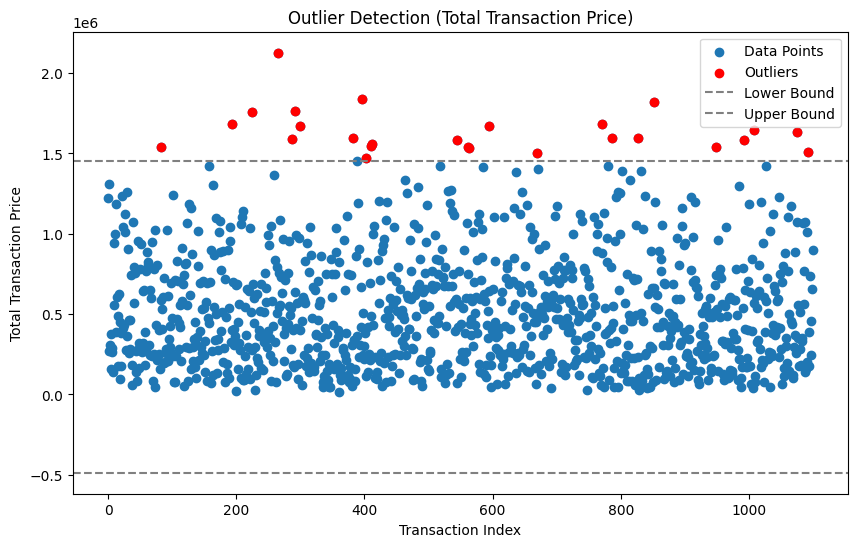

In [ ]:
# Visualize outlier detection
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data['Total Harga Transaksi'], label='Data Points')
plt.scatter(outlier_harga.index, outlier_harga['Total Harga Transaksi'], color='red', label='Outliers')

# Calculate the IQR for 'Total Harga Transaksi'
Q1 = data['Total Harga Transaksi'].quantile(0.25)
Q3 = data['Total Harga Transaksi'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.axhline(y=lower_bound, color='gray', linestyle='dashed', label='Lower Bound')
plt.axhline(y=upper_bound, color='gray', linestyle='dashed', label='Upper Bound')

plt.xlabel('Transaction Index')
plt.ylabel('Total Transaction Price')
plt.title('Outlier Detection (Total Transaction Price)')
plt.legend()
plt.show()

DATA PREPARATION

In [ ]:
data.fillna(0, inplace=True)
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ID Transaksi,Tanggal Transaksi,Metode Pembayaran,Nama Barang 1,Kategori Barang 1,Jumlah Barang Dibeli 1,Harga Barang 1,Nama Barang 2,Kategori Barang 2,Jumlah Barang Dibeli 2,...,Kategori Barang 4,Jumlah Barang Dibeli 4,Harga Barang 4,Nama Barang 5,Kategori Barang 5,Jumlah Barang Dibeli 5,Harga Barang 5,Total Harga Transaksi,bulan,tahun
0,AgPeeLTL,2024-03-02,Cash,Life Cat Pouch Dus,Makanan Kucing,7,108000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,1,...,Makanan Kucing,4.0,55833.0,Life Cat Tofu - Mango,Makanan Kucing,1.0,55833.0,1219665,3,2024
1,X3ih6KPj,2024-09-19,Transfer Bank,Life Cat Pouch Dus,Makanan Kucing,7,108000,Makanan Anjing Purina,Makanan Anjing,2,...,Makanan Kucing,7.0,45000.0,Life Cat Can - Chicken & Salmon,Makanan Kucing,10.0,12000.0,1308740,9,2024
2,yJhNjYUP,2024-06-15,Cash,Makanan Anjing Purina,Makanan Anjing,5,50000,Life Cat Pouch - Salmon Adult,Makanan Kucing,5,...,0,0.0,0.0,0,0,0.0,0.0,272265,6,2024
3,JSEmCzSj,2024-05-25,Transfer Bank,Makanan Ikan Gupi,Makanan Ikan,4,35000,Life Cat Pouch - Chicken Tuna Adult,Makanan Kucing,6,...,Makanan Kucing,8.0,12000.0,Mainan Anjing Kong,Mainan Anjing,1.0,20000.0,305175,5,2024
4,31sF5GKo,2024-02-27,Transfer Bank,Life Cat Can - Kitten Tuna,Makanan Kucing,7,12000,Mainan Anjing Kong,Mainan Anjing,4,...,Makanan Kucing,6.0,11000.0,Life Cat Pouch - Salmon Adult,Makanan Kucing,9.0,4453.0,378293,2,2024


In [ ]:
# Convert 'Tanggal Transaksi' to datetime format
data['Tanggal Transaksi'] = pd.to_datetime(data['Tanggal Transaksi'])

# Extract month and year for grouping
data['bulan'] = data['Tanggal Transaksi'].dt.month
data['tahun'] = data['Tanggal Transaksi'].dt.year

# Group by month and count transactions
monthly_transactions = data.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_transaksi')

# Pivot for better visualization
monthly_pivot = monthly_transactions.pivot(index='bulan', columns='tahun', values='jumlah_transaksi')

# Plot the distribution of transactions per month
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Distribusi Transaksi per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], rotation=45)
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()


Modeling data

In [ ]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install -U mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer


def combine_products(row):
    items = []
    for i in range(1, 6):
        if pd.notnull(row[f'Nama Barang {i}']):
            items.append(row[f'Nama Barang {i}'])
    return items

data['Produk Dibeli'] = data.apply(combine_products, axis=1)


mlb = MultiLabelBinarizer()
one_hot = pd.DataFrame(mlb.fit_transform(data['Produk Dibeli']), columns=mlb.classes_)


frequent_itemsets = apriori(one_hot, min_support=0.05, use_colnames=True)


results = []
for index, row in frequent_itemsets.iterrows():
    items = list(row['itemsets'])
    support = row['support']
    if len(items) > 1:
        for item in items:
            lhs = items.copy()
            lhs.remove(item)
            rhs = item
            confidence = support / frequent_itemsets[frequent_itemsets['itemsets'] == frozenset(lhs)]['support'].values[0]
            lift = confidence / frequent_itemsets[frequent_itemsets['itemsets'] == frozenset([rhs])]['support'].values[0]
            results.append({'lhs': lhs, 'rhs': rhs, 'confidence': confidence, 'lift': lift, 'support': support})


rules_df = pd.DataFrame(results)

rules_df.sort_values(by='lift', ascending=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,lhs,rhs,confidence,lift,support
0,[Life Cat Pouch Dus],Life Cat Pouch - Chicken Tuna Adult,0.238494,1.165969,0.051818
1,[Life Cat Pouch - Chicken Tuna Adult],Life Cat Pouch Dus,0.253333,1.165969,0.051818
2,[Life Cat Pouch - Kitten Tuna],Life Cat Pouch - Salmon Adult,0.231092,1.105225,0.050000
3,[Life Cat Pouch - Salmon Adult],Life Cat Pouch - Kitten Tuna,0.239130,1.105225,0.050000
4,[Life Cat Tofu - Mango],Makanan Ikan Gupi,0.215909,1.006356,0.051818
5,[Makanan Ikan Gupi],Life Cat Tofu - Mango,0.241525,1.006356,0.051818


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# 1. Simulasi Data Validasi
# Data transaksi aktual (actual_transactions)
actual_transactions = [
    ['Life Cat Pouch Dus'],
    ['Life Cat Pouch - Salmon Adult', 'Life Cat Pouch - Kitten Tuna'],
    ['Life Cat Tofu - Mango', 'Life Cat Pouch - Chicken Tuna Adult'],
    ['Life Cat Pouch - Chicken Tuna Adul']
]

# Data rekomendasi dari model (recommended_products)
recommended_products = [
    ['Life Cat Pouch Dus', 'Life Cat Pouch - Chicken Tuna Adult'],
    ['Life Cat Pouch - Kitten Tuna', 'Life Cat Pouch - Salmon Adult'],
    ['Life Cat Tofu - Mango', 'Makanan Ikan Gupi']
]

# 2. Konversi ke Format Binary
# Flatten the lists for evaluation
flatten_actual = [item for sublist in actual_transactions for item in sublist]
flatten_recommended = [item for sublist in recommended_products for item in sublist]

# Create a unified list of all unique items
unique_items = list(set(flatten_actual + flatten_recommended))

# Convert to binary format
actual_binary = [1 if item in flatten_actual else 0 for item in unique_items]
recommended_binary = [1 if item in flatten_recommended else 0 for item in unique_items]

# Penghitungan Metrik Evaluasi
precision = precision_score(actual_binary, recommended_binary)
recall = recall_score(actual_binary, recommended_binary)
accuracy = accuracy_score(actual_binary, recommended_binary)
f1 = f1_score(actual_binary, recommended_binary)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.83
Recall: 0.83
Accuracy: 0.71
F1-Score: 0.83


evaluasi

In [ ]:
total_rules = len(rules_df)
average_support = rules_df['support'].mean()
average_confidence = rules_df['confidence'].mean()
average_lift = rules_df['lift'].mean()

print(f"Total Aturan Dihasilkan: {total_rules}")
print(f"Rata-rata Support: {average_support:.4f}")
print(f"Rata-rata Confidence: {average_confidence:.4f}")
print(f"Rata-rata Lift: {average_lift:.4f}")


Total Aturan Dihasilkan: 6
Rata-rata Support: 0.0512
Rata-rata Confidence: 0.2366
Rata-rata Lift: 1.0925


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


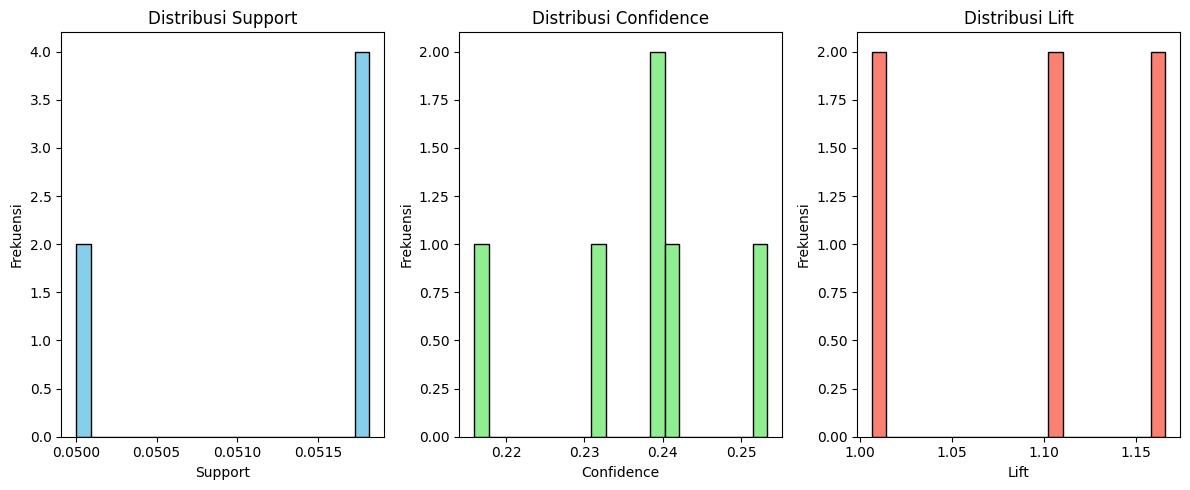

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi distribusi metrik
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(rules_df['support'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Support')
plt.xlabel('Support')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
plt.hist(rules_df['confidence'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribusi Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
plt.hist(rules_df['lift'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribusi Lift')
plt.xlabel('Lift')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


In [ ]:
# Filter aturan dengan threshold tertentu
min_confidence = 0.2
min_lift = 1.0

filtered_rules = rules_df[(rules_df['confidence'] >= min_confidence) & (rules_df['lift'] >= min_lift)]

print(f"Total Aturan Setelah Filter: {len(filtered_rules)}")
print(filtered_rules.sort_values(by='lift', ascending=False))


Total Aturan Setelah Filter: 6
                                     lhs                                  rhs  \
1                   [Life Cat Pouch Dus]  Life Cat Pouch - Chicken Tuna Adult   
0  [Life Cat Pouch - Chicken Tuna Adult]                   Life Cat Pouch Dus   
2        [Life Cat Pouch - Salmon Adult]         Life Cat Pouch - Kitten Tuna   
3         [Life Cat Pouch - Kitten Tuna]        Life Cat Pouch - Salmon Adult   
4                [Life Cat Tofu - Mango]                    Makanan Ikan Gupi   
5                    [Makanan Ikan Gupi]                Life Cat Tofu - Mango   

   confidence      lift   support  
1    0.238494  1.165969  0.051818  
0    0.253333  1.165969  0.051818  
2    0.239130  1.105225  0.050000  
3    0.231092  1.105225  0.050000  
4    0.215909  1.006356  0.051818  
5    0.241525  1.006356  0.051818  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statistik Aturan:
Total Aturan Dihasilkan: 6
Rata-rata Support: 0.0512
Rata-rata Confidence: 0.2366
Rata-rata Lift: 1.0925
Filtered Rules:
Total Aturan Setelah Filter: 0


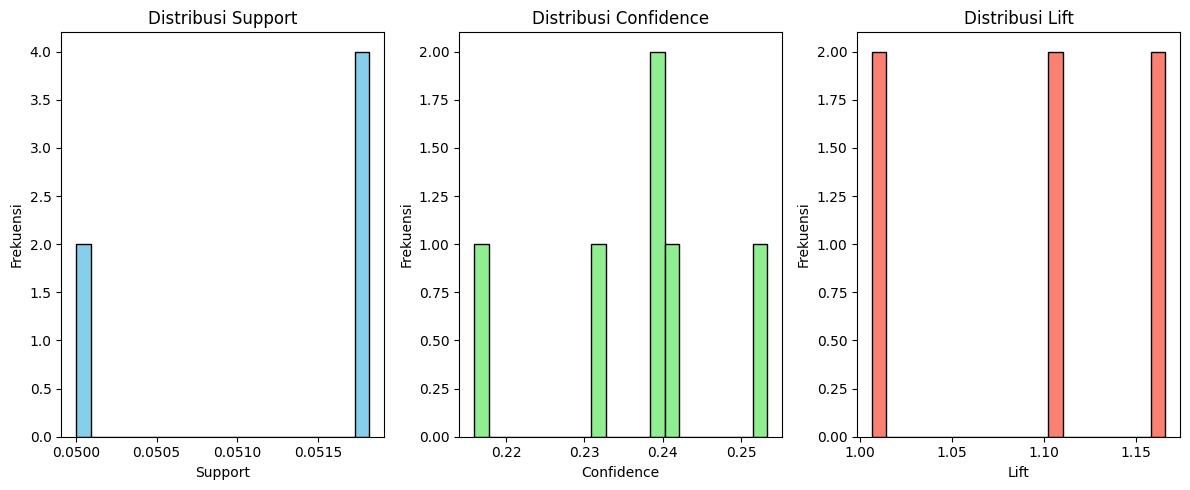

In [ ]:
# # Statistik aturan asosiasi
# print("Statistik Aturan:")
# print(f"Total Aturan Dihasilkan: {len(rules_df)}")
# print(f"Rata-rata Support: {rules_df['support'].mean():.4f}")
# print(f"Rata-rata Confidence: {rules_df['confidence'].mean():.4f}")
# print(f"Rata-rata Lift: {rules_df['lift'].mean():.4f}")

# # Filter aturan dengan threshold
# min_confidence = 0.6
# min_lift = 1.2

# filtered_rules = rules_df[(rules_df['confidence'] >= min_confidence) & (rules_df['lift'] >= min_lift)]

# print("Filtered Rules:")
# print(f"Total Aturan Setelah Filter: {len(filtered_rules)}")

# import matplotlib.pyplot as plt

# # Visualisasi distribusi metrik
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 3, 1)
# plt.hist(rules_df['support'], bins=20, color='skyblue', edgecolor='black')
# plt.title('Distribusi Support')
# plt.xlabel('Support')
# plt.ylabel('Frekuensi')

# plt.subplot(1, 3, 2)
# plt.hist(rules_df['confidence'], bins=20, color='lightgreen', edgecolor='black')
# plt.title('Distribusi Confidence')
# plt.xlabel('Confidence')
# plt.ylabel('Frekuensi')

# plt.subplot(1, 3, 3)
# plt.hist(rules_df['lift'], bins=20, color='salmon', edgecolor='black')
# plt.title('Distribusi Lift')
# plt.xlabel('Lift')
# plt.ylabel('Frekuensi')

# plt.tight_layout()
# plt.show()


In [ ]:
# # Gabungkan fitur produk ke dalam satu string
# def get_combined_features(product_name, data):
#     # Initialize an empty string to store features
#     features = ""

#     # Iterate through all columns that might contain product names
#     for i in range(1, 6):
#       if product_name in data[f'Nama Barang {i}'].values:
#           idx = data[data[f'Nama Barang {i}'] == product_name].index[0]
#           # Combine category and price into the features string
#           features += f"{data.loc[idx, f'Kategori Barang {i}']} {data.loc[idx, f'Harga Barang {i}']} "

#     return features.strip()

# # Buat representasi fitur untuk semua produk yang ditemukan di Apriori
# unique_products = set()
# for lhs, rhs in zip(rules_df['lhs'], rules_df['rhs']):
#     unique_products.update(lhs)
#     unique_products.add(rhs)

# product_data = pd.DataFrame(
#     [(product, get_combined_features(product, data)) for product in unique_products],
#     columns=["Produk", "Fitur"]
# )

# # Replace any empty features with a placeholder
# product_data['Fitur'] = product_data['Fitur'].replace("", "no features")

# # Transformasikan fitur menjadi vektor numerik menggunakan TF-IDF
# vectorizer = TfidfVectorizer()
# feature_matrix = vectorizer.fit_transform(product_data['Fitur'])

# # Hitung matriks kemiripan antar produk
# similarity_matrix = cosine_similarity(feature_matrix)

# # Membuat rekomendasi berdasarkan kesamaan
# def recommend_products(product_name, top_n=5):
#     if product_name not in product_data['Produk'].values:
#         return "Produk tidak ditemukan dalam data."

#     product_idx = product_data[product_data['Produk'] == product_name].index[0]
#     similarity_scores = list(enumerate(similarity_matrix[product_idx]))
#     similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

#     recommendations = []
#     for idx, score in similarity_scores[1:top_n+1]:  # Skip self-similarity
#         recommendations.append((product_data.iloc[idx]['Produk'], score))
#     return recommendations

# # Contoh: Rekomendasikan produk untuk "Makanan Kucing"
# recommended_products = recommend_products("Makanan Kucing", top_n=5)
# print("Rekomendasi untuk Makanan Kucing:")
# if isinstance(recommended_products, list):
#   for product, score in recommended_products:
#       print(f"{product} (Kemiripan: {score:.2f})")
# else:
#   print(recommended_products)

# # %%
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Combine category and price into a single feature
# data['Combined Features'] = data.apply(
#     lambda row: f"{row['Kategori Barang 1']} {row['Harga Barang 1']}", axis=1)

# # Transform features into a vectorized form
# vectorizer = TfidfVectorizer()
# feature_matrix = vectorizer.fit_transform(data['Combined Features'])

# # Compute similarity
# similarity_matrix = cosine_similarity(feature_matrix)

# # Example: Recommend products similar to the first product
# similar_products = list(enumerate(similarity_matrix[0]))
# similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)

# # Display top 5 recommendations
# print("Top recommendations:")
# for idx, score in similar_products[1:6]:  # Exclude the first (self-similarity)
#     print(data.iloc[idx]['Nama Barang 1'], "-", score)

Rekomendasi untuk Makanan Kucing:
Produk tidak ditemukan dalam data.
Top recommendations:
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Combine category and price into a single feature
# data['Combined Features'] = data.apply(
#     lambda row: f"{row['Kategori Barang 1']} {row['Harga Barang 1']}", axis=1)

# # Transform features into a vectorized form
# vectorizer = TfidfVectorizer()
# feature_matrix = vectorizer.fit_transform(data['Combined Features'])

# # Compute similarity
# similarity_matrix = cosine_similarity(feature_matrix)

# # Example: Recommend products similar to the first product
# similar_products = list(enumerate(similarity_matrix[0]))
# similar_products = sorted(similar_products, key=lambda x: x[1], reverse=True)

# # Display top 5 recommendations
# print("Top recommendations:")
# for idx, score in similar_products[1:6]:  # Exclude the first (self-similarity)
#     print(data.iloc[idx]['Nama Barang 1'], "-", score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top recommendations:
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
Life Cat Pouch Dus - 1.0
